In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('student_info.csv')

In [27]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [28]:
df.shape

(200, 2)

In [29]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [31]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

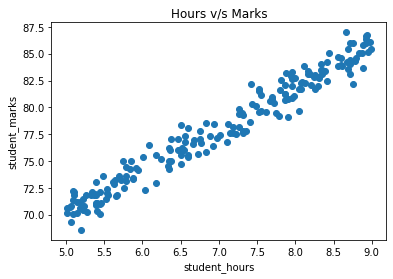

In [32]:
plt.scatter(x = df.study_hours, y=df.student_marks)
plt.xlabel('student_hours')
plt.ylabel('student_marks')
plt.title('Hours v/s Marks')
plt.show()

In [33]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [34]:
df2 = df.fillna(df.mean())

In [35]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [36]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [37]:
X = df2['study_hours']
y = df2['student_marks']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr.coef_

array([[3.97731714]])

In [43]:
lr.intercept_

array([50.11685353])

In [45]:
y_pred = lr.predict(X_test)

In [49]:
lr.score(X_test,y_test)

0.9424696866315474

In [47]:
from sklearn import metrics

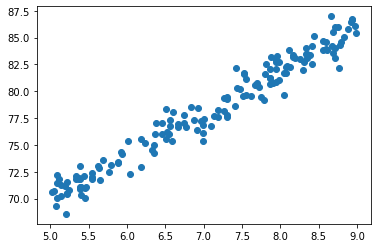

In [50]:
plt.scatter(X_train,y_train)

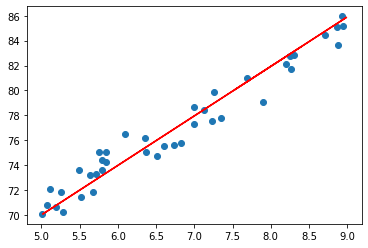

In [51]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train), color='r')

In [52]:
import joblib
joblib.dump(lr, 'student_mark_predictor.pkl')

['student_mark_predictor.pkl']

In [53]:
model = joblib.load('student_mark_predictor.pkl')

In [56]:
model.predict([[5]])[0][0]

70.00343924847365